In [46]:
from pandas import DataFrame, read_csv, factorize
import numpy as np

In [2]:
df: DataFrame = read_csv('stroke_data.csv', sep=',')
df.head()

,0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,Female,18.0,0,0,No,Private,Urban,94.19,12.12,smokes,1
1,2,Male,58.0,1,0,Yes,Private,Rural,154.24,33.70,never_smoked,0
2,3,Female,36.0,0,0,Yes,Govt_job,Urban,72.63,24.70,smokes,0
3,4,Female,62.0,0,0,Yes,Self-employed,Rural,85.52,31.20,formerly smoked,0
4,5,Female,82.0,0,0,Yes,Private,Rural,59.32,33.20,smokes,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67135 entries, 0 to 67134
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   0                  67135 non-null  int64  
 1   gender             67135 non-null  object 
 2   age                67135 non-null  float64
 3   hypertension       67135 non-null  int64  
 4   heart_disease      67135 non-null  int64  
 5   ever_married       67135 non-null  object 
 6   work_type          67135 non-null  object 
 7   Residence_type     67135 non-null  object 
 8   avg_glucose_level  67135 non-null  float64
 9   bmi                67135 non-null  float64
 10  smoking_status     67135 non-null  object 
 11  stroke             67135 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 6.1+ MB


In [4]:
df['stroke'].value_counts()

1    40287
0    26848
Name: stroke, dtype: int64

In [10]:
df['stroke'].groupby(by=df['work_type']).sum()

work_type
Govt_job          5164
Never_worked        85
Private          23711
Self-employed    10807
children           520
Name: stroke, dtype: int64

In [12]:
df['gender'].value_counts()

Female    39530
Male      27594
Other        11
Name: gender, dtype: int64

In [19]:
df.groupby(by=df['hypertension'])['stroke'].sum()

hypertension
0    31470
1     8817
Name: stroke, dtype: int64

In [22]:
df.groupby(by=df['age'])['stroke'].sum().sort_values(ascending=False)

age
79.00    2916
78.00    2279
80.00    1858
81.00    1738
82.00    1427
         ... 
6.00        0
7.00        0
8.00        0
9.00        0
0.08        0
Name: stroke, Length: 104, dtype: int64

In [24]:
df.loc[df['age'] > 50, 'stroke'].value_counts()

1    28938
0    10119
Name: stroke, dtype: int64

In [32]:
df.loc[df['stroke']==0].describe()

,0,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,26848.000000,26848.000000,26848.000000,26848.000000,26848.000000,26848.000000,26848.0
mean,33518.952361,39.754443,0.081943,0.049501,103.602731,27.989679,0.0
std,19399.072043,23.874178,0.274283,0.216915,42.302894,7.874654,0.0
min,2.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.0
25%,16685.750000,19.000000,0.000000,0.000000,77.330000,22.400000,0.0
50%,33510.000000,42.000000,0.000000,0.000000,91.210000,27.500000,0.0
75%,50302.250000,59.000000,0.000000,0.000000,111.310000,32.100000,0.0
max,67132.000000,82.000000,1.000000,1.000000,281.590000,97.600000,0.0


In [33]:
df.loc[df['stroke']==1].describe()

,0,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,40287.000000,40287.000000,40287.000000,40287.000000,40287.000000,40287.000000,40287.0
mean,33600.686251,60.093189,0.218855,0.136024,119.953070,29.942491,1.0
std,19368.034272,19.189072,0.413475,0.342818,55.488967,6.419063,0.0
min,1.000000,1.320000,0.000000,0.000000,55.010000,10.800000,1.0
25%,16876.500000,48.000000,0.000000,0.000000,79.315000,25.600000,1.0
50%,33608.000000,65.000000,0.000000,0.000000,96.970000,29.700000,1.0
75%,50385.500000,78.000000,0.000000,0.000000,158.160000,32.800000,1.0
max,67135.000000,82.000000,1.000000,1.000000,291.050000,92.000000,1.0


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
x: list = ['age','bmi','hypertension', 'heart_disease','avg_glucose_level']
y: list = ['stroke']

xtreino, xteste, ytreino, yteste = train_test_split(df[x], df[y], 
                                                    test_size=0.3, 
                                                    random_state=0)

model = DecisionTreeClassifier()
model.fit(xtreino, ytreino)
pre = model.predict(xteste)
print(accuracy_score(yteste, pre))

0.7190804825976863


In [53]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
df['gender'] = oe.fit_transform(df['gender'].values.reshape(-1,1))
df['smoking_status'] = oe.fit_transform(df['smoking_status'].values.reshape(-1,1))


x: list = ['age','gender','smoking_status','bmi','hypertension', 'heart_disease','avg_glucose_level']
y: list = ['stroke']

xtreino, xteste, ytreino, yteste = train_test_split(df[x], df[y], 
                                                    test_size=0.3, 
                                                    random_state=0)

model = DecisionTreeClassifier()
model.fit(xtreino, ytreino)
pre = model.predict(xteste)
print(accuracy_score(yteste, pre))

0.8628171391688595


In [54]:
model.feature_importances_

array([0.16854219, 0.01072433, 0.39575031, 0.18530668, 0.01287015,
       0.00869923, 0.21810711])

In [55]:
model.get_depth()

49

In [59]:
model.max_leaf_nodes

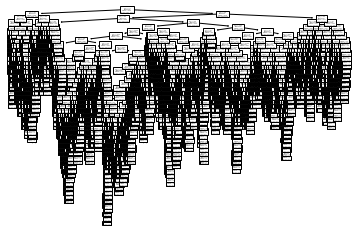

In [61]:
import matplotlib.pyplot as plt
from sklearn import tree

_ = tree.plot_tree(model)